In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from discreteenvironment import DiscreteEnvironment
from dataobject import DataObject

In [3]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)

In [4]:
env = DiscreteEnvironment()
start, goal, traj = env.generateTrajectory()
print (str.format('start :{}', start))
print (str.format('goal :{}', goal))
print ('Steps of trajectory : [x_t  u_t  x_t+1]')
print (traj)

start :[ 6 20]
goal :[11 10]
Steps of trajectory : [x_t  u_t  x_t+1]
[[ 6 20  0 -1  6 19]
 [ 6 19  0 -1  6 18]
 [ 6 18  0 -1  6 17]
 [ 6 17  0 -1  6 16]
 [ 6 16  0 -1  6 15]
 [ 6 15  1 -1  7 14]
 [ 7 14  1 -1  8 13]
 [ 8 13  1 -1  9 12]
 [ 9 12  1 -1 10 11]
 [10 11  1 -1 11 10]]


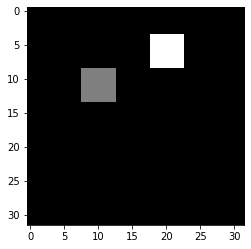

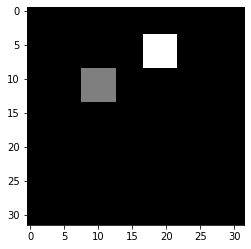

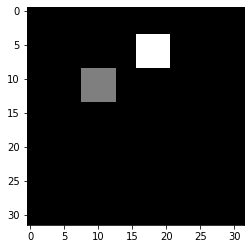

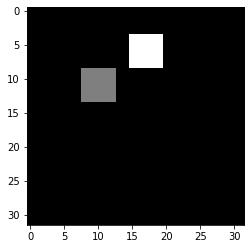

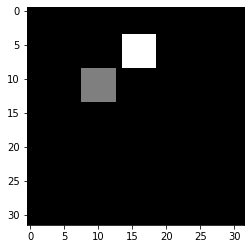

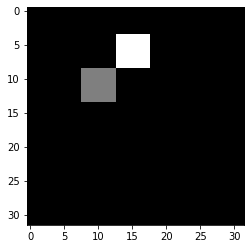

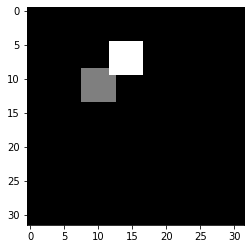

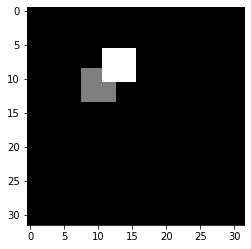

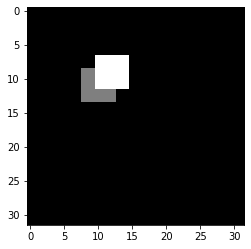

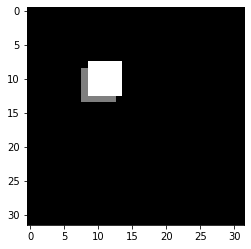

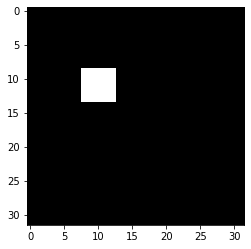

In [6]:
for i in range(len(traj)):
    img = env.generateImage(traj[i, 0:2], goal)
    fig = plt.figure()
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()
    
img = env.generateImage(traj[len(traj)-1, 4:], goal)
fig = plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

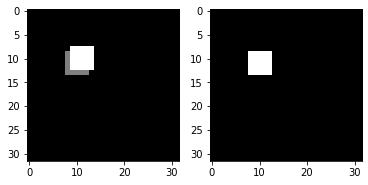

In [8]:
fig = plt.figure()
rows = 1
for r in range(rows):
    plt.subplot(rows,2,r*2 + 1)
    plt.imshow(env.generateImage(traj[i, :2], goal), cmap=plt.get_cmap('gray'))
    plt.subplot(rows,2,r*2 + 2)
    plt.imshow(env.generateImage(traj[i, 4:], goal), cmap=plt.get_cmap('gray'))

In [11]:
# data sample = x_t, y_t, I_t, u_t, x_t+1, y_t+1, I_t+1
def generate_trajectory_data(no_of_trajectories):
    buffer_size = no_of_trajectories * 10
    x_dim = 2
    y_dim = 2
    I_dim = 32 * 32
    u_dim = 2
    total_sequence_dim = 2 * (x_dim + y_dim + I_dim) + u_dim
    dIndex = 0
    data = np.zeros((buffer_size, total_sequence_dim))
    env = DiscreteEnvironment()
    for i in range(no_of_trajectories):
        start, goal, traj = env.generateTrajectory()
        for j in range(len(traj)):
            do = DataObject.from_values_sequence(traj[j, :2].reshape(-1, 1),
                                                 goal.reshape(-1,1),
                                                 env.generateImage(traj[j, :2], goal).reshape(-1, 1),
                                                 traj[j, 2:4].reshape(-1, 1),
                                                 traj[j, 4:].reshape(-1, 1),
                                                 goal.reshape(-1,1),
                                                 env.generateImage(traj[j, 4:], goal).reshape(-1, 1))
            data[dIndex] = do.rawData.reshape(1, -1)
            dIndex += 1
            if dIndex == len(data):
                data = np.concatenate((data, np.zeros((buffer_size, total_sequence_dim))), axis=0)
    data = data[:dIndex]
    return data

In [12]:
seq_samples = generate_trajectory_data(3)

In [13]:
print (seq_samples.shape)

(73, 2058)


In [14]:
print (seq_samples[:, 0:4])

[[19.  4. 18. 26.]
 [19.  5. 18. 26.]
 [19.  6. 18. 26.]
 [19.  7. 18. 26.]
 [19.  8. 18. 26.]
 [19.  9. 18. 26.]
 [19. 10. 18. 26.]
 [19. 11. 18. 26.]
 [19. 12. 18. 26.]
 [19. 13. 18. 26.]
 [19. 14. 18. 26.]
 [19. 15. 18. 26.]
 [19. 16. 18. 26.]
 [19. 17. 18. 26.]
 [19. 18. 18. 26.]
 [19. 19. 18. 26.]
 [19. 20. 18. 26.]
 [19. 21. 18. 26.]
 [19. 22. 18. 26.]
 [19. 23. 18. 26.]
 [19. 24. 18. 26.]
 [19. 25. 18. 26.]
 [ 8.  2. 18. 27.]
 [ 8.  3. 18. 27.]
 [ 8.  4. 18. 27.]
 [ 8.  5. 18. 27.]
 [ 8.  6. 18. 27.]
 [ 8.  7. 18. 27.]
 [ 8.  8. 18. 27.]
 [ 8.  9. 18. 27.]
 [ 8. 10. 18. 27.]
 [ 8. 11. 18. 27.]
 [ 8. 12. 18. 27.]
 [ 8. 13. 18. 27.]
 [ 8. 14. 18. 27.]
 [ 8. 15. 18. 27.]
 [ 8. 16. 18. 27.]
 [ 8. 17. 18. 27.]
 [ 9. 18. 18. 27.]
 [10. 19. 18. 27.]
 [11. 20. 18. 27.]
 [12. 21. 18. 27.]
 [13. 22. 18. 27.]
 [14. 23. 18. 27.]
 [15. 24. 18. 27.]
 [16. 25. 18. 27.]
 [17. 26. 18. 27.]
 [20.  2. 25. 28.]
 [20.  3. 25. 28.]
 [20.  4. 25. 28.]
 [20.  5. 25. 28.]
 [20.  6. 25. 28.]
 [20.  7. 25

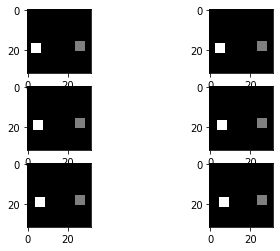

In [16]:
fig = plt.figure()
rows = 3
do = DataObject(2,2,32*32,2)
do.fill_from_array(seq_samples)
for r in range(rows):
    plt.subplot(rows,2,r*2 + 1)
    plt.imshow(do.I[r].reshape((32, 32)), cmap=plt.get_cmap('gray'))
    plt.subplot(rows,2,r*2 + 2)
    plt.imshow(do.In[r].reshape((32, 32)), cmap=plt.get_cmap('gray'))

In [17]:
d = DataObject(2,2,32*32,2)
d.fill_from_array(seq_samples[3, :].reshape(1, -1))
print (d.x)
print (d.y)
print (d.u)
print (d.xn)
print (d.yn)
print (d.I)
print (d.In)

[[19.  7.]]
[[18. 26.]]
[[0. 1.]]
[[19.  8.]]
[[18. 26.]]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.

In [20]:
root_folder = '../data/demoplanner/version2/'

train_samples = generate_trajectory_data(10000)
np.savetxt(root_folder+'train.csv', train_samples, fmt="%5.1f", delimiter=",")
print ('Training data generated')

test_samples = generate_trajectory_data(500)
np.savetxt(root_folder+'test.csv', test_samples, fmt="%5.1f", delimiter=",")
print ('Test data generated')

Training data generated
Test data generated


In [21]:
print (train_samples.shape)
print (test_samples.shape)

(129779, 2058)
(6648, 2058)


In [10]:
np.set_printoptions(**opt)